<a href="https://colab.research.google.com/github/UdayG01/Sentiment-Analysis-NLP/blob/main/ABSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aspect Based Sentiment Analysis

* Prior to implementing ABSA, I surfed about Traditional sentiment analysis, and why we needed to switch. Traditional (Negative, Neutral, Positive) sentiment analysis, also known as rule-based sentiment analysis, uses a predefined set of rules to analyze text and determine whether it expresses a positive, negative, or neutral sentiment. Eventually, we aggregate the sentiment scores and output whether the entire sentence shall be deemed as +/-/o.

* Though the setbacks that I realised about this is: what if I have a review statement like: "Overall, the performance of the phone is satisfactory, though the processor could have been a bit better", now in terms of net performance, I would give it a +, but for processor this review gives -, but the traditional technique does take into account this context.

<h5>ABSA</h5>

* Hence, we moved to ABSA, it identifies various 'aspects' with respect to which we may judge our statement, and thereon performs the sentiment analysis.
* I used a pretrained model from 'hugging-face' to implement the ABSA below.
* The task introduced me to 'Transformers', various types of 'Tokenizers'- BPE, wordpiece, sentencepiece ...
* The code loads the model, takes the input sentence and the aspects with respect to which we need the model to perform ABSA, and hence give out the results.

<h5>Usecase:</h5>

* I realised that this has heavy applications in businesses that need to monitor customer satisfactions with their products or services in terms of different criterias.
* Like for a company like Samsung- customers might give an up for the product design and tech, however a low for customer support, the organization may then work accordingly.

In [ ]:
# ! pip install transformers[sentencepiece]

# SentencePiece - A type of tokenizer.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
from transformers import pipeline

# Loading pre-trained ABSA model
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
absa_model = AutoModelForSequenceClassification.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

# Loading a traditional model
sentiment_model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_model = pipeline("sentiment-analysis", model=sentiment_model_path,
                          tokenizer=sentiment_model_path)

# I also implemented another model: "LiYuan/amazon-review-sentiment-analysis"

Input Sentence: Visiting the breathtaking coastal town was an unforgettable experience, where the stunning seascapes, picturesque sunsets, and charming local culture left me in awe, though the limited transportation options and pricey accommodations were minor inconveniences that can be overlooked in light of the overall magical ambiance.
Sentence: Visiting the breathtaking coastal town was an unforgettable experience, where the stunning seascapes, picturesque sunsets, and charming local culture left me in awe, though the limited transportation options and pricey accommodations were minor inconveniences that can be overlooked in light of the overall magical ambiance.

Enter aspects separated by ','

Aspects: Coastal scenery , Sunsets , Local culture , Transportation options , Accommodation prices , Overall ambiance

Sentiment of aspect 'Coastal scenery' is:
Label negative: 0.0019275880185887218
Label neutral: 0.011906099505722523
Label positive: 0.9861663579940796


Sentiment of aspect

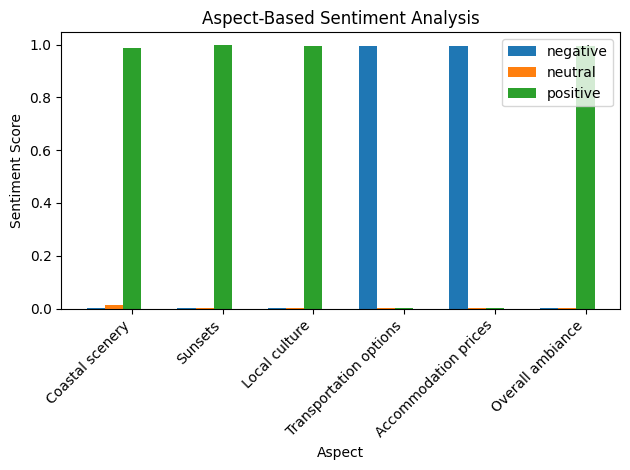

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from transformers import pipeline

# Loading pre-trained ABSA model
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
absa_model = AutoModelForSequenceClassification.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

# Get the input sentence
sentence = input("Input Sentence: ")
print(f"Sentence: {sentence}")
print()

# Aspects for ABSA
print("Enter aspects separated by ','\n")
aspects = [x.strip() for x in input("Aspects: ").split(",")]

# Below is the sentence that I'll be testing the model on:
'''Visiting the breathtaking coastal town was an unforgettable experience,
where the stunning seascapes, picturesque sunsets, and charming local culture left me in awe,
though the limited transportation options and pricey accommodations were minor inconveniences that can be overlooked
in light of the overall magical ambiance.'''

# and the Aspects for the ABSA:
'''
1. Coastal scenery
2. Sunsets
3. Local culture
4. Transportation options
5. Accommodation prices
6. Overall ambiance
'''

# ABSA with respect to each aspect
aspect_sentiments = {}

for aspect in aspects:
    inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
    outputs = absa_model(**inputs)
    probs = F.softmax(outputs.logits, dim=1)
    probs = probs.detach().numpy()[0]
    aspect_sentiments[aspect] = probs

    print(f"\nSentiment of aspect '{aspect}' is:")
    for prob, label in zip(probs, ["negative", "neutral", "positive"]):
        print(f"Label {label}: {prob}")
    print()

# Loading a traditional model
sentiment_model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_model = pipeline("sentiment-analysis", model=sentiment_model_path,
                          tokenizer=sentiment_model_path)
sentiment = sentiment_model([sentence])[0]
print(f"Overall sentiment: {sentiment['label']} with score {sentiment['score']}")

# Plotting the bar graph
labels = ["negative", "neutral", "positive"]
x = range(len(aspects))
width = 0.2

fig, ax = plt.subplots()

for i, label in enumerate(labels):
    sentiment_scores = [aspect_sentiments[aspect][i] for aspect in aspects]
    ax.bar([pos + i * width for pos in x], sentiment_scores, width, label=label)

ax.set_xticks([pos + 2 * width for pos in x])
ax.set_xticklabels(aspects, rotation=45, ha='right')
ax.set_xlabel('Aspect')
ax.set_ylabel('Sentiment Score')
ax.set_title('Aspect-Based Sentiment Analysis')
ax.legend()

plt.tight_layout()
plt.show()
